In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True,validation_size=18000)
import matplotlib.pyplot as plt
import numpy as np
import random as ran
import tensorflow as tf

/home/kritz/anaconda3/envs/scripts/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
print(mnist.train.images.shape)

(42000, 784)


In [3]:
# To stop potential randomness
seed = 128
rng = np.random.RandomState(seed)

In [4]:
# Parameters
learning_rate = 0.1
num_steps = 500
batch_size = 50
#display_step = 100

# Network Parameters
n_hidden_1 = 15 # 1st layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

In [5]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'out': tf.Variable(tf.random_normal([n_hidden_1, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

In [6]:
# Create model
def neural_net(x):
    # Hidden fully connected layer with neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    return out_layer

In [7]:
# Construct model
logits = neural_net(X)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [8]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)
    #Saving session
    saver = tf.train.Saver()
    lossTrain,accTrain,lossValid,accValid,ii = [],[],[],[],[]
    for i in range(0, num_steps):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        valid_x,valid_y = mnist.validation.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        # Calculate batch loss and accuracy
        lossT, accT = sess.run([loss_op, accuracy], feed_dict={X: batch_x,Y: batch_y})
        lossV, accV = sess.run([loss_op, accuracy], feed_dict={X: valid_x,Y: valid_y})
        lossTrain.append(lossT)
        accTrain.append(accT)
        lossValid.append(lossV)
        accValid.append(accV)
        ii.append(i)
        saver.save(sess, r'./nnModel1',global_step = i+1)
    print("Testing Accuracy:", sess.run(accuracy, feed_dict={X: mnist.test.images,Y: mnist.test.labels}))

Testing Accuracy: 0.8136


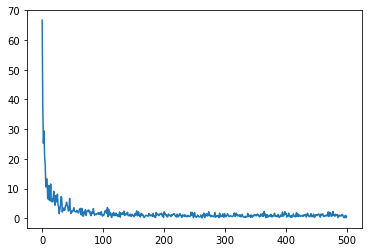

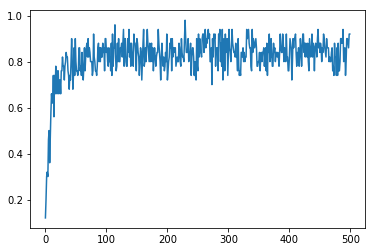

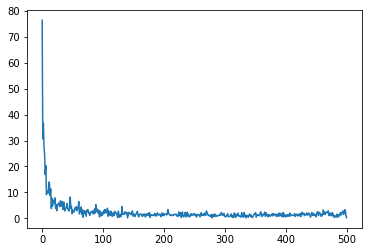

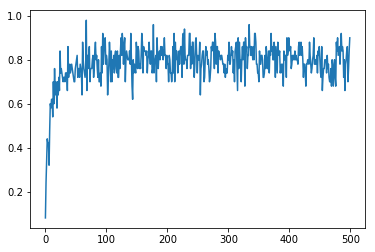

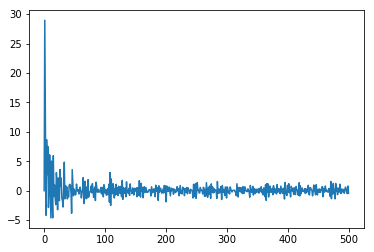

In [9]:
plt.plot(ii,lossTrain)
plt.show()
plt.plot(ii,accTrain)
plt.show()
plt.plot(ii,lossValid)
plt.show()
plt.plot(ii,accValid)
plt.show()
first,diffList = lossTrain[0],[]
for each in lossTrain:
    diff = first-each
    first = each
    diffList.append(diff)
plt.plot(ii,diffList)
plt.show()

In [10]:
# Calculate accuracy for MNIST test images
sess = tf.Session()
new_saver = tf.train.import_meta_graph('nnModel1-500.meta')
new_saver.restore(sess, tf.train.latest_checkpoint('./'))
print("Testing Accuracy:", sess.run(accuracy, feed_dict={X: mnist.test.images,Y: mnist.test.labels}))

INFO:tensorflow:Restoring parameters from ./nnModel1-500
Testing Accuracy: 0.8136
